# CAPTCHA Project

In [1]:
# load needed libraries.
import os

import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import tensorflow as tf

import glob

## Read images into numpy vector

(1040, 50, 200, 4)


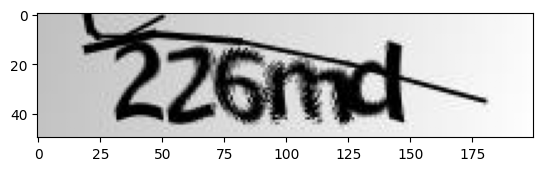

In [2]:
# Loads images, converts to numpy array, and displays first image
image_files = glob.glob(os.path.join("samples", '*.png'))
images = numpy.array([plt.imread(img) for img in image_files])
print(images.shape)
plt.imshow(images[0])
plt.show()

## Slice chatracters and convert to white and black pixels

In [5]:
# Processing the images
IMG_THRESHHOLD = 170

#grayscale versions of images
new_img = []
#list of names of each image
names = []

# define region of each slice
imagew =    [[30,55],
            [50, 75],
            [70, 95],
            [90, 115],
            [110, 135]]

img_num = 0

# Slice and threshold
for img in range(len(image_files)):
    temp = image_files[img][8:13]
    for a in range(5):
        new_img.append([])
        names.append(temp[a])
        # Apply threshold to each pixel
        for w in range(imagew[a][0], imagew[a][1]):
            for h in range(images.shape[1]):
                if images[img][h][w][0] < IMG_THRESHHOLD/255:
                    new_img[img_num].append(images[img][h][w][0])
                else:
                    new_img[img_num].append(1.0)

        img_num += 1

## Plot sliced characters

(5200, 1250)


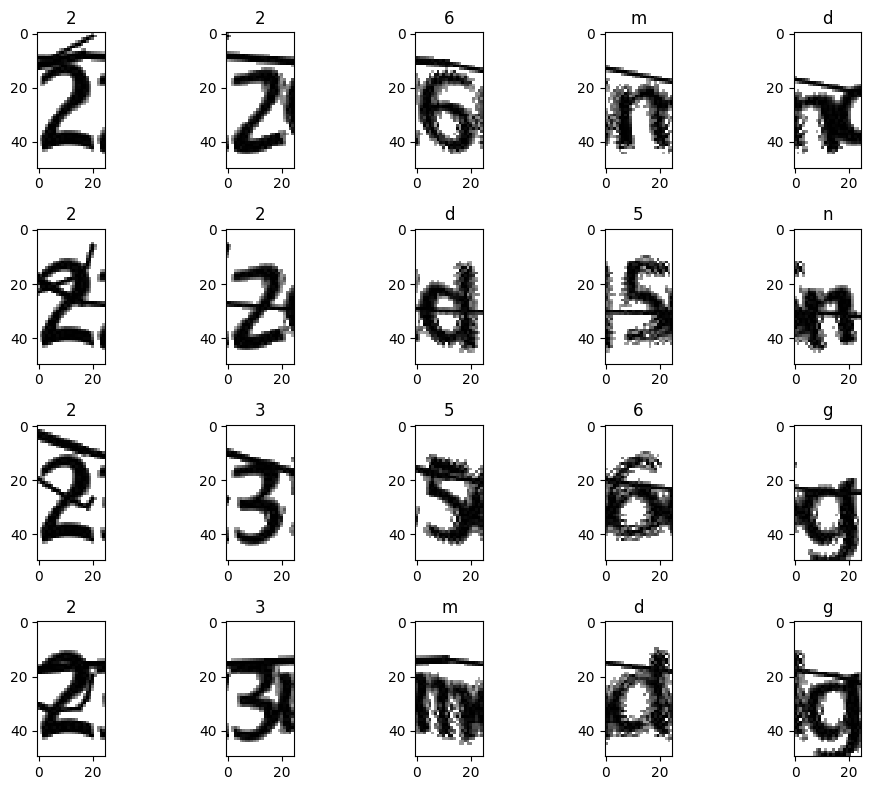

In [22]:
# Convert to numpy array and check shape
new_img = numpy.array(new_img)
print(new_img.shape)

# For outputting some of new_image's characters
fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # Adjust figsize as needed

# Loop through the images and corresponding axes to display them
for i, ax in enumerate(axes.flat):
    for x in range(5):
        # Calculate the start and end index for the current section
        start_idx = x * 50 * (imagew[x][1] - imagew[x][0])
        end_idx = (x + 1) * 50 * (imagew[x][1] - imagew[x][0])
        # Reshape only the appropriate section of new_img[i]
        reshaped_image = np.reshape(new_img[i], (imagew[x][1] - imagew[x][0], 50)).T
        ax.imshow(reshaped_image, cmap='gray', interpolation="nearest")  # Display each image section in grayscale
        ax.set_title(names[i])

# Display the grid of images
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Training and Testing
## Split Data into Testing and Training groups

In [21]:
# Split data into training and testing groups
x_train, x_test, y_train, y_test = train_test_split(new_img, names, test_size = 0.25, random_state = 0)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Confirm shape
print("Training x:", x_train.shape,"y:", y_train.shape)
print("Testing x:", x_test.shape,"y:", y_test.shape)

Training x: (3900, 1250) y: (3900,)
Testing x: (1300, 1250) y: (1300,)


## Test Decision Tree and Random Forest on default parameters

In [18]:
# Fit and test Decision Tree
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print(f"Decision Tree accuracy: {tree.score(x_test, y_test)}")

# Fit and test Random Forest
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
print(f"Random Forest accuracy: {forest.score(x_test,y_test)}")

Decision Tree accuracy: 0.6876923076923077
Random Forest accuracy: 0.9030769230769231


## Plot Decision Tree performance in a range of max_features values

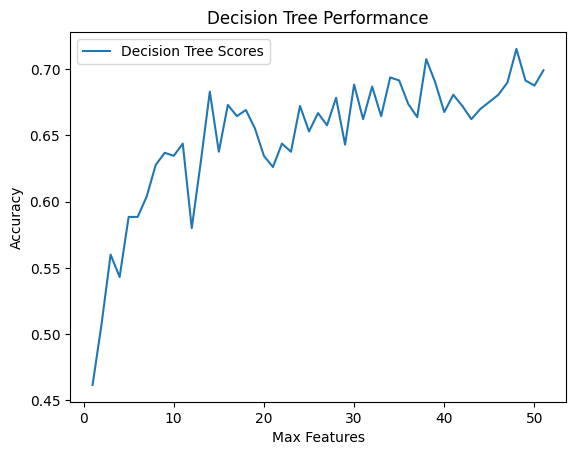

In [17]:
max_tree_features = 52  # Limit max_features to a reasonable number
step = 1

# Each graph
scores = []
# Iterate over a valid range of max_features
for i in range(1, max_tree_features, step):
    treeI = DecisionTreeClassifier(max_features=i)
    treeI.fit(x_train, y_train)
    scores.append(treeI.score(x_test, y_test))
# Label and plot
plt.plot(range(1, max_tree_features, step), scores, label='Decision Tree Scores')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance')
plt.legend()
plt.show()

## Plot Random Forest performance in a range of max_features values
This cell can take quite a while to run, tweak parameters as needed

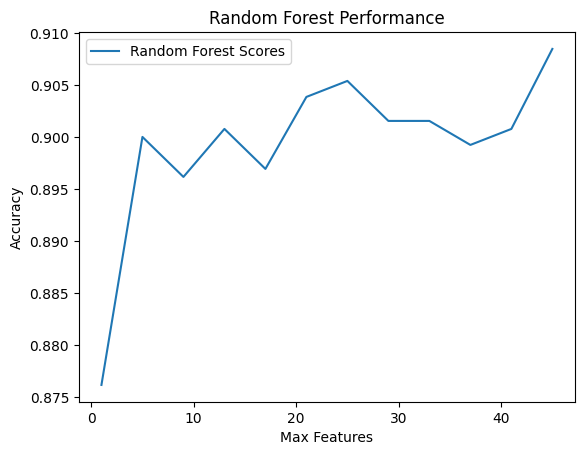

In [16]:
max_forest_features = 48
step = 4

scores = []
# Iterate over a valid range of max_features
for i in range(1, max_forest_features, step):
    treeI = RandomForestClassifier(max_features=i)
    treeI.fit(x_train, y_train)
    scores.append(treeI.score(x_test, y_test))
# Label and plot
plt.plot(range(1, max_forest_features, step), scores, label='Random Forest Scores')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance')
plt.legend()
plt.show()